In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fishLength = pd.read_csv('./Downloads/x06Simple(1).csv')

In [3]:
def trainTestSplit(data, ratio):
    np.random.seed(0)
    shuffledIndices = np.random.permutation(len(data))
    testSize = int(len(data)*ratio)
    testIndices = shuffledIndices[:testSize]
    trainIndices = shuffledIndices[testSize:]
    return data.iloc[trainIndices], data.iloc[testIndices]

trainingData, testingData = trainTestSplit(fishLength, 0.33)

In [4]:
len(trainingData)

30

In [5]:
len(testingData)

14

In [6]:
x1 = trainingData["Age"]
xt1 = testingData["Age"]
x2 = trainingData["Temp of Water"]
xt2 = testingData["Temp of Water"]
y = trainingData["Length of Fish"]
yTest = testingData["Length of Fish"]

In [34]:
yTest1 = np.array(y)
yTest1 = np.array([y])
Y = yTest1.T
Y

array([[3214],
       [4495],
       [3255],
       [ 590],
       [4015],
       [3040],
       [4530],
       [2110],
       [3535],
       [4315],
       [4566],
       [2805],
       [1915],
       [4465],
       [1205],
       [1315],
       [3920],
       [1215],
       [ 590],
       [2140],
       [3935],
       [1305],
       [2140],
       [4600],
       [4535],
       [4570],
       [3030],
       [3257],
       [2600],
       [ 620]])

In [8]:
x = np.array([x1, x2])
xt = np.array([xt1, xt2])
mean = np.mean(x, axis = 1)
std = np.std(x, axis = 1, ddof = 1)
meanT = np.mean(xt, axis = 1)
stdT = np.std(xt, axis = 1, ddof = 1)
print(mean, std, meanT, stdT)

[78.56666667 27.86666667] [45.96451655  2.33021138] [93.07142857 28.28571429] [41.10112161  2.16363552]


In [9]:
xT, xtT = x.T, xt.T

In [10]:
normX , normXT= (xT-mean)/std, (xtT-meanT)/stdT

In [11]:
normXTrans, normXTTrans = normX.T, normXT.T
nX0, nX1, nXT0, nXT1 = normXTrans[0], normXTrans[1], normXTTrans[0], normXTTrans[1]

    


In [38]:
eta = 0.01
max_iterations = 1000
m = 100
theta = np.random.randn(3,1)
theta

array([[ 1.25441407],
       [ 1.41910204],
       [-0.74385608]])

In [51]:

xNew = np.c_[np.ones((30,1)), nX0, nX1]
xNewTest = np.c_[np.ones((14,1)), nXT0, nXT1]
count = 0
for iterations in range(max_iterations):
    gradients = 2/m * xNew.T.dot(xNew.dot(theta) - Y)
    theta = theta - eta * gradients
    count = count + 1
theta
count

1000

In [45]:
yHat = xNew.dot(theta)
yH = (Y - yHat)

In [46]:
mse = (yH.T.dot(yH))/ len(Y)
rmse = np.sqrt(mse)
rmse

array([[552.27752277]])

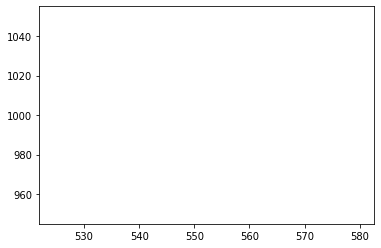

In [52]:
plt.plot(rmse, count)
plt.show()

In [56]:
yTest1 = np.array([yTest])
yTest11 = yTest1.T
yTest11

array([[4525],
       [2710],
       [3920],
       [3110],
       [4600],
       [2890],
       [4515],
       [ 625],
       [3020],
       [4565],
       [4520],
       [4600],
       [3180],
       [2120]])

In [58]:
yHatT = xNewTest.dot(theta)
yHT = (yTest11 - yHatT)

In [60]:
mseT = (yHT.T.dot(yHT))/ len(yTest11)
rmseT = np.sqrt(mseT)
rmseT

array([[855.18631737]])